# Analysis of Fatal dealth cause by Police Force
##### BY [Adam CHEN JINGHAO](https://chenjinghao.github.io/)

To view the washington post latest analysis [here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).<br>
To view the latest database on [Github](https://github.com/washingtonpost/data-police-shootings).

![the Plan](Planning.drawio.png "the Plan")

##### Import packages: 

In [643]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



In [644]:
df_deaths_by_police = pd.read_csv('Deaths_by_Police_US.csv', encoding='windows-1252')
df_household_income = pd.read_csv('Median_Household_Income_2015.csv', encoding='windows-1252')
df_pct_over_25_completed_high_school = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='windows-1252')
df_pct_people_below_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding='windows-1252')
df_share_of_race_by_state_city = pd.read_csv('Share_of_Race_By_City.csv', encoding='windows-1252')

##### Preview & Clean data

###### Deaths by police US

In [645]:
df_deaths_by_police.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
890,1046,Somer Speer,25/11/15,shot,gun,37.0,F,W,Ozark,MO,False,attack,Not fleeing,False
1541,1732,Richard Risher,25/07/16,shot,gun,18.0,M,B,Los Angeles,CA,False,attack,Foot,False
2316,2575,Ryan Lowell,12/05/17,shot,gun,30.0,M,W,Billings,MT,True,attack,Not fleeing,False
2443,2724,Jose Guillermo Flores Colon,29/06/17,shot,Taser,37.0,M,NaN,Deltona,FL,False,other,Not fleeing,False
1607,1796,Daniel Kevin Harris,18/08/16,shot,unarmed,29.0,M,W,Charlotte,NC,False,other,Car,True


In [646]:
df_deaths_by_police.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [647]:
print(f'Is there any null avlue? {df_deaths_by_police.isnull().values.any()}')

Is there any null avlue? True


In [648]:
print(f'Is ther any duplicated value? {df_deaths_by_police.duplicated().values.any()}')

Is ther any duplicated value? False


1. null values in armed, age, race, and flee columnes
2. date colume data type should be datatime
3. age columen data type should be int

In [649]:
df_deaths_by_police = df_deaths_by_police.dropna()

In [650]:
print(f'Is there any null avlue? {df_deaths_by_police.isnull().values.any()}')

Is there any null avlue? False


In [651]:
df_deaths_by_police['date'] = pd.to_datetime(df_deaths_by_police['date'])

In [652]:
df_deaths_by_police['age'] = df_deaths_by_police['age'].astype('int')

In [653]:
df_deaths_by_police.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2342,2601,Jorge Alberto Fuentes,2017-05-23,shot and Tasered,gun,21,M,H,Glendale,AZ,False,attack,Other,False


In [654]:
df_deaths_by_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   int32         
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

###### Median Household Income 2015

In [655]:
df_household_income.sample(5)

,Geographic Area,City,Median Income
4763,FL,Pelican Bay CDP,104806
19223,OH,Ballville CDP,52129
17644,NY,Pawling village,56000
22232,PA,Irwin borough,41419
14473,MO,Rushville town,45313


In [656]:
df_household_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [657]:
print(f'Is ther any null value? {df_household_income.isnull().values.any()}')

Is ther any null value? True


In [658]:
print(f'Is ther any duplicated value? {df_household_income.duplicated().values.any()}')

Is ther any duplicated value? False


1. Median Income has some missing value, also its data type should change to int

In [659]:
df_household_income = df_household_income.dropna()

In [660]:
print(f'Is ther any null value? {df_household_income.isnull().values.any()}')

Is ther any null value? False


In [661]:
df_household_income = df_household_income[df_household_income['Median Income'] != '(X)' ]
df_household_income = df_household_income[df_household_income['Median Income'] != '-' ]

In [662]:
df_household_income['Median Income'] = df_household_income['Median Income'].str.extract(r'(\d+\.\d+|\d+)').astype(int)

In [663]:
df_household_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 0 to 29320
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  27418 non-null  object
 1   City             27418 non-null  object
 2   Median Income    27418 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 749.7+ KB


###### Pct Over 25 Completed High School

In [664]:
df_pct_over_25_completed_high_school.sample(5)

,Geographic Area,City,percent_completed_hs
7815,IN,Monroe City town,94.4
26159,TX,Valle Verde CDP,-
6229,IL,Caledonia village,85.3
9978,KY,Fulton city,79.3
19570,OH,Girard city,87.3


In [665]:
df_pct_over_25_completed_high_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


1. percent_completed_hs should be float

In [666]:
print(f'Is there any null avlue? {df_pct_over_25_completed_high_school.isnull().values.any()}')

Is there any null avlue? False


In [667]:
print(f'Is there any duplicated value? {df_pct_over_25_completed_high_school.duplicated().values.any()}')

Is there any duplicated value? False


In [668]:
df_pct_over_25_completed_high_school = df_pct_over_25_completed_high_school[df_pct_over_25_completed_high_school['percent_completed_hs'] != '-']

In [669]:
df_pct_over_25_completed_high_school['percent_completed_hs'] = df_pct_over_25_completed_high_school['percent_completed_hs'].astype(float)

In [670]:
df_pct_over_25_completed_high_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29132 non-null  object 
 1   City                  29132 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.4+ KB


###### Pct People below poverty Level

In [671]:
df_pct_people_below_poverty.sample(5)

,Geographic Area,City,poverty_rate
17775,NY,Salem village,8.2
6298,IL,Clay City village,19.2
17223,NY,Geneseo village,41.5
22180,PA,Herminie CDP,19.2
12289,MI,South Range village,17


In [672]:
df_pct_people_below_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


1. poverty_rate should be float

In [673]:
print(f'Is there any null value? {df_pct_people_below_poverty.isnull().values.any()}')

Is there any null value? False


In [674]:
print(f'Is there any duplicated value? {df_pct_people_below_poverty.duplicated().values.any()}')

Is there any duplicated value? False


In [675]:
df_pct_people_below_poverty = df_pct_people_below_poverty[df_pct_people_below_poverty['poverty_rate'] != '-']

In [676]:
df_pct_people_below_poverty['poverty_rate'] = df_pct_people_below_poverty['poverty_rate'].astype(float)

In [677]:
df_pct_people_below_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


###### Share of Race by city

In [678]:
df_share_of_race_by_state_city.sample(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
14664,MT,Alder CDP,99,0,0,1,1
20537,OK,Dibble town,85.8,0,4.3,0.5,8.1
26608,VT,Manchester village,94.8,0.1,0,4,1.5
3497,CO,Brighton city,77.4,1.5,1.4,1.3,40.5
9603,KS,Phillipsburg city,96.7,0.5,0.2,1.1,2.6


In [679]:
df_share_of_race_by_state_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [680]:
print(f'Is there any null value? {df_share_of_race_by_state_city.isnull().values.any()}')

Is there any null value? False


In [681]:
print(f'Is there any duplicated value? {df_share_of_race_by_state_city.duplicated().values.any()}')

Is there any duplicated value? False


1. except Geographic area and City columnes, other columns need to change data type to float

In [682]:
df_share_of_race_by_state_city = df_share_of_race_by_state_city[df_share_of_race_by_state_city['share_asian'] != '(X)']

In [683]:
df_share_of_race_by_state_city['share_asian'] = pd.to_numeric(df_share_of_race_by_state_city['share_asian'])


In [684]:
df_share_of_race_by_state_city['share_black'] = pd.to_numeric(df_share_of_race_by_state_city['share_black'])


In [685]:
df_share_of_race_by_state_city['share_hispanic'] = pd.to_numeric(df_share_of_race_by_state_city['share_hispanic'])


In [686]:
df_share_of_race_by_state_city['share_native_american'] = pd.to_numeric(df_share_of_race_by_state_city['share_native_american'])


In [687]:
df_share_of_race_by_state_city['share_white'] = pd.to_numeric(df_share_of_race_by_state_city['share_white'])

In [688]:
df_share_of_race_by_state_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [689]:
df_share_of_race_by_state_city.sample()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
28074,WV,Hometown CDP,98.7,0.0,0.0,0.1,0.4


##### Descriptive Statistics

###### What is the total number of death by year? 

In [690]:
df_deaths_by_police['year'] = df_deaths_by_police['date'].dt.year

In [691]:
df_deaths_by_police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,2017-07-25,shot,undetermined,16,M,B,Marion,AR,False,undetermined,Not fleeing,False,2017
2523,2808,Kesharn K. Burney,2017-07-26,shot,vehicle,25,M,B,Dayton,OH,False,attack,Car,False,2017
2525,2820,Deltra Henderson,2017-07-27,shot,gun,39,M,B,Homer,LA,False,attack,Car,False,2017
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28,M,B,Oshkosh,WI,False,attack,Car,True,2017


In [692]:
df_deaths_by_police_trend = df_deaths_by_police.groupby(['year'], as_index=False)['id'].count()

In [693]:
df_deaths_by_police_trend['year'] = pd.to_datetime(df_deaths_by_police_trend['year'], format="%Y")

In [694]:
df_deaths_by_police_trend['year'] = df_deaths_by_police_trend['year'].dt.year

In [695]:
df_deaths_by_police_trend

,year,id
0,2015,947
1,2016,873
2,2017,434


Text(0, 0.5, 'Count')

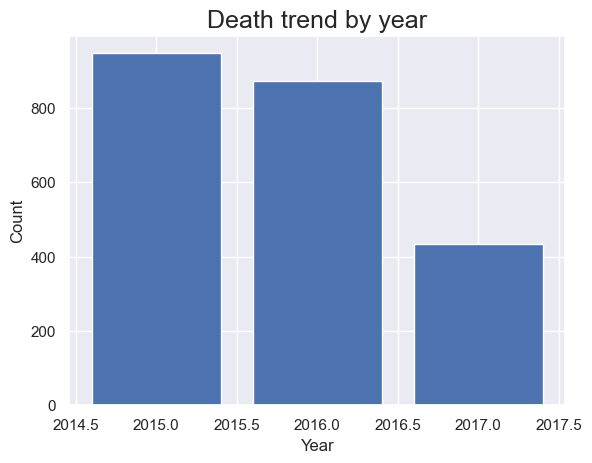

In [696]:
trend = plt.subplot()
trend.bar(x=df_deaths_by_police_trend.year,
          height=df_deaths_by_police_trend.id)
trend.set_title("Death trend by year", fontsize=18)
trend.set_xlabel('Year')
trend.set_ylabel('Count')

###### What are the age distribution amoung the victims? 

In [697]:
df_deaths_by_police['age'].describe()

count    2254.000000
mean       36.254215
std        12.838671
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

C:\Users\JingH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2800x1600 with 0 Axes>

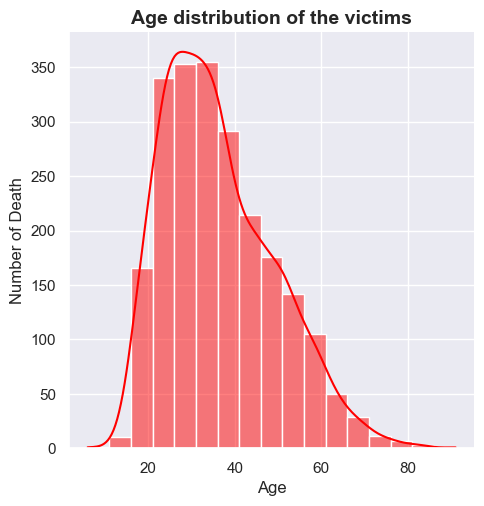

In [698]:
plt.figure(figsize=(14,8), dpi=200)
sns.displot(data=df_deaths_by_police['age'],
            kind='hist',
            kde=True,
            color='red',
            binwidth=5)
sns.set_theme()
plt.title(f'Age distribution of the victims',
          fontsize=14,
          fontweight='bold'
          )
plt.xlabel('Age')
plt.ylabel('Number of Death')
plt.show()

###### Is women more likely to get kill? 

In [699]:
df_deaths_by_police_gender = df_deaths_by_police.groupby(by='gender').count()['id']

In [700]:
df_deaths_by_police_gender

gender
F      94
M    2160
Name: id, dtype: int64

Text(0.5, 1.0, 'Gender distribution of the victims')

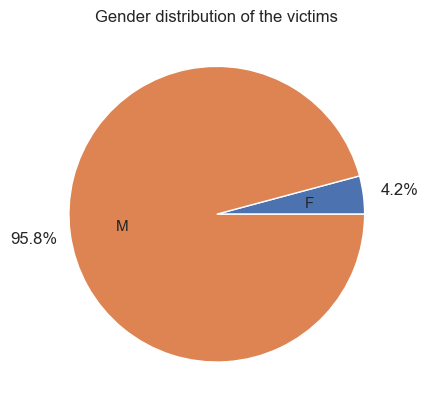

In [701]:
gender = plt.subplot()
gender.pie(x=df_deaths_by_police_gender.values,
           labels=df_deaths_by_police_gender.index,
           autopct='%1.1f%%',
           pctdistance=1.25,
           labeldistance=.6)
gender.set_title('Gender distribution of the victims')

###### What weapon the victim holding while engaging with police? 

In [702]:
df_deaths_by_police_armed = df_deaths_by_police.groupby(by='armed').count().sort_values(by='id', ascending=False).head(6)
df_deaths_by_police_armed = df_deaths_by_police_armed['id']
df_deaths_by_police_armed

armed
gun             1247
knife            324
unarmed          165
vehicle          158
toy weapon       102
undetermined      92
Name: id, dtype: int64

Text(0.5, 1.0, "Top 6 Victims' weapon used distrubtion")

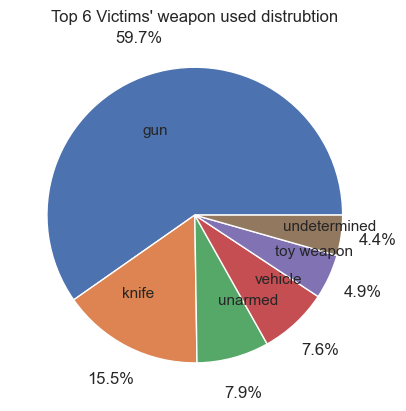

In [703]:
armed = plt.subplot()
armed.pie(df_deaths_by_police_armed.values,
          labels=df_deaths_by_police_armed.index,
          autopct='%1.1f%%',
           pctdistance=1.25,
           labeldistance=.6)
armed.set_title("Top 6 Victims' weapon used distrubtion")

###### What is the race distribution here? 

In [704]:
df_deaths_by_police_race = df_deaths_by_police.groupby('race').count().sort_values(by='id', ascending=False)
df_deaths_by_police_race = df_deaths_by_police_race['name']
df_deaths_by_police_race

race
W    1168
B     592
H     401
A      36
N      29
O      28
Name: name, dtype: int64

Text(0.5, 1.0, 'Race distribution')

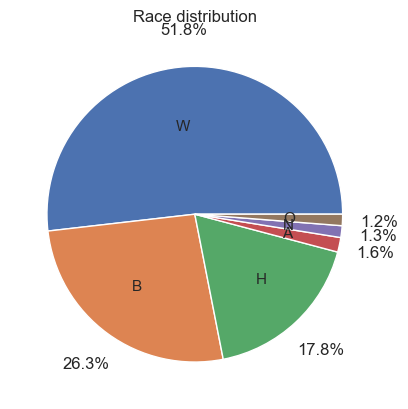

In [705]:
race_pie_chart = plt.subplot()
race_pie_chart.pie(df_deaths_by_police_race.values,
        labels=df_deaths_by_police_race.index,
        autopct='%1.1f%%',
        pctdistance=1.25, 
        labeldistance=.6)
race_pie_chart.set_title('Race distribution')

###### What are the top 10 cities? 

In [706]:
df_deaths_by_police_city = df_deaths_by_police.groupby(by=['city'])['id'].count().sort_values(ascending=False)

df_deaths_by_police_city = df_deaths_by_police_city.head(10)

In [707]:
df_deaths_by_police_city.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis'],
      dtype='object', name='city')

Text(0.5, 1.0, 'Top 10 Cities')

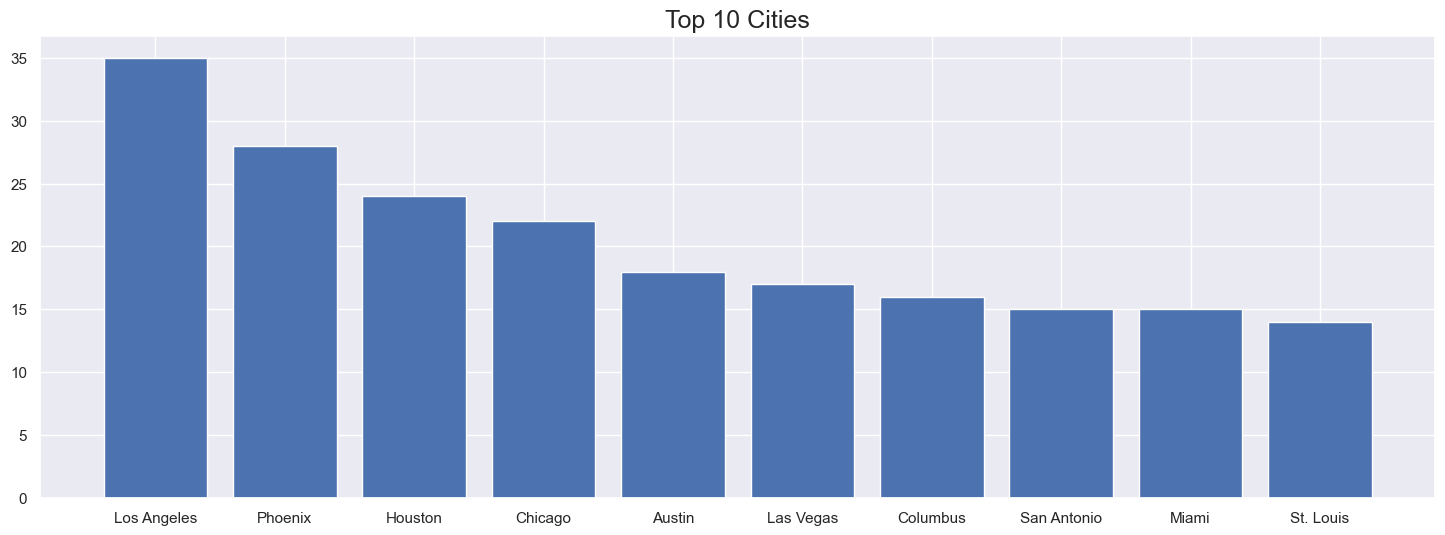

In [708]:
plt.figure(figsize=(18,6))
city = plt.subplot()
city.bar(x=df_deaths_by_police_city.index,
         height=df_deaths_by_police_city.values)
city.set_title('Top 10 Cities', fontsize=18)


In [709]:
df_deaths_by_police_state = df_deaths_by_police.groupby('state').count().sort_values(by='id', ascending=False)
df_deaths_by_police_state = df_deaths_by_police_state['id']
df_deaths_by_police_state.describe()

count     51.000000
mean      44.196078
std       57.717942
min        2.000000
25%       13.000000
50%       34.000000
75%       49.000000
max      366.000000
Name: id, dtype: float64

Text(0.5, 1.0, 'Victims distribution by states')

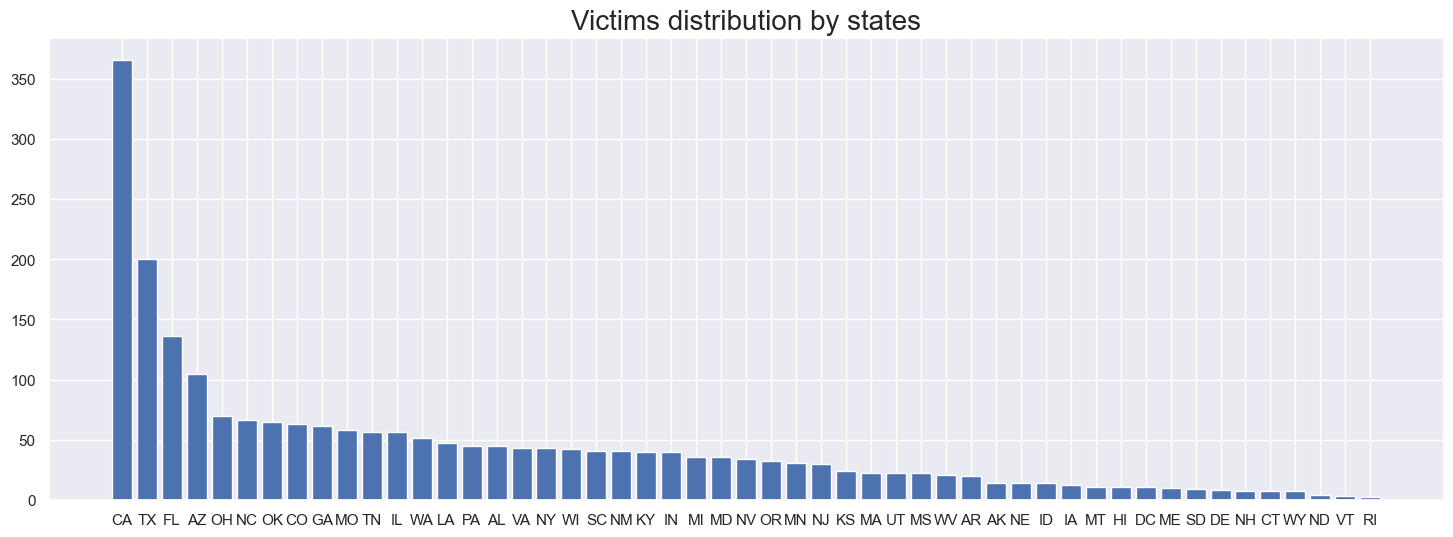

In [710]:
plt.figure(figsize=(18,6))
state = plt.subplot()

state.bar(x=df_deaths_by_police_state.index,
          height=df_deaths_by_police_state.values)
state.set_title('Victims distribution by states', fontsize=20)

###### How many victims have mental illness when they were killed? 

In [711]:
df_deaths_by_police_mental = df_deaths_by_police.groupby('signs_of_mental_illness').count().sort_values(by='id', ascending=False)
df_deaths_by_police_mental = df_deaths_by_police_mental['id']
df_deaths_by_police_mental

signs_of_mental_illness
False    1681
True      573
Name: id, dtype: int64

Text(0.5, 1.0, 'Distribution of victim mental illness')

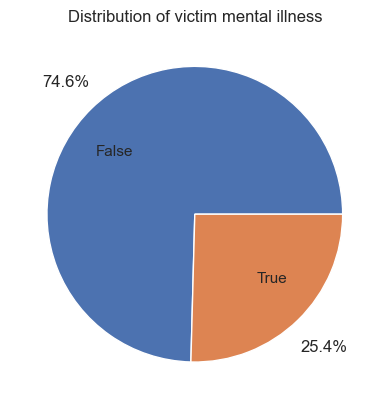

In [712]:
mental_illness_pie_chart = plt.subplot()
mental_illness_pie_chart.pie(df_deaths_by_police_mental.values,
        labels=df_deaths_by_police_mental.index,
        autopct='%1.1f%%',
        pctdistance=1.25, 
        labeldistance=.6)
mental_illness_pie_chart.set_title('Distribution of victim mental illness')

In [713]:
victims_with_mental_issue = df_deaths_by_police[df_deaths_by_police['signs_of_mental_illness'] == True]

In [714]:
victims_with_mental_issue = victims_with_mental_issue.groupby('state').count().sort_values(by='id', ascending=False)

In [715]:
victims_with_mental_issue = victims_with_mental_issue.rename(columns={'id':'Count'})

In [716]:
px.bar(data_frame=victims_with_mental_issue,
       x=victims_with_mental_issue.index,
       y=victims_with_mental_issue['Count'],
       title='Victims with Mental Issue by State'
       )

###### What is the threat level? 

In [717]:
df_deaths_by_police_threat_level = df_deaths_by_police.groupby('threat_level').count().sort_values(by='id', ascending=False)
df_deaths_by_police_threat_level = df_deaths_by_police_threat_level['id']
df_deaths_by_police_threat_level

threat_level
attack          1462
other            677
undetermined     115
Name: id, dtype: int64

([<matplotlib.patches.Wedge at 0x2b759a960e0>,
 [Text(-0.2700818678327622, 0.5357758716739364, 'attack'),
  Text(0.18111011723770512, -0.5720132213805418, 'other'),
  Text(0.5923090672811985, -0.09575995413781656, 'undetermined')],
 [Text(-0.5626705579849214, 1.116199732654034, '64.9%'),
  Text(0.377312744245219, -1.1916942112094622, '30.0%'),
  Text(1.2339772235024968, -0.19949990445378452, '5.1%')])

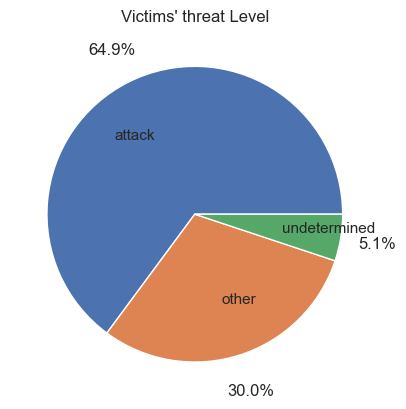

In [718]:
threat_level = plt.subplot()
threat_level.set_title("Victims' threat Level")
threat_level.pie(df_deaths_by_police_threat_level.values,
                 labels=df_deaths_by_police_threat_level.index,autopct='%1.1f%%',
                 pctdistance=1.25, 
                 labeldistance=.6)

###### Did victims flee from the police?

In [719]:
df_deaths_by_police_flee = df_deaths_by_police.groupby('flee').count().sort_values(by='id', ascending=False)
df_deaths_by_police_flee = df_deaths_by_police_flee['id']
df_deaths_by_police_flee

flee
Not fleeing    1528
Car             360
Foot            278
Other            88
Name: id, dtype: int64

([<matplotlib.patches.Wedge at 0x2b759a75b10>,
 [Text(-0.3181563678149103, 0.5087008213270582, 'Not fleeing'),
  Text(0.029257774047781238, -0.5992862276556745, 'Car'),
  Text(0.48383234793632157, -0.35483271987011883, 'Foot'),
  Text(0.5954925038545773, -0.07340761440754122, 'Other')],
 [Text(-0.6628257662810632, 1.0597933777647044, '67.8%'),
  Text(0.06095369593287758, -1.2485129742826553, '16.0%'),
  Text(1.00798405820067, -0.7392348330627475, '12.3%'),
  Text(1.2406093830303693, -0.1529325300157109, '3.9%')])

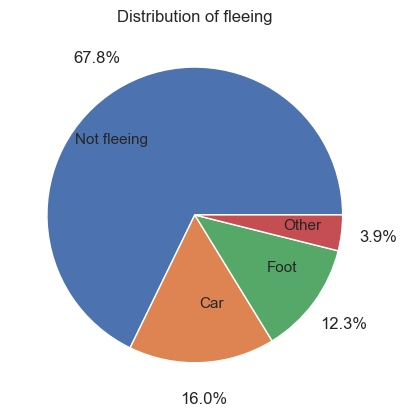

In [720]:
flee = plt.subplot()
flee.set_title('Distribution of fleeing')
flee.pie(df_deaths_by_police_flee.values,
         labels=df_deaths_by_police_flee.index,
         autopct='%1.1f%%',
         pctdistance=1.25, 
         labeldistance=.6)

###### Are police turn on their body camera?

In [721]:
df_deaths_by_police_bcam = df_deaths_by_police.groupby('body_camera').count().sort_values(by='id', ascending=False)
df_deaths_by_police_bcam = df_deaths_by_police_bcam['id']
df_deaths_by_police_bcam

body_camera
False    2002
True      252
Name: id, dtype: int64

([<matplotlib.patches.Wedge at 0x2b7578318a0>,
 [Text(-0.5633693092542933, 0.2064340606352074, 'False'),
  Text(0.5633692947584782, -0.20643410019503786, 'True')],
 [Text(-1.1736860609464443, 0.4300709596566821, '88.8%'),
  Text(1.1736860307468295, -0.43007104207299557, '11.2%')])

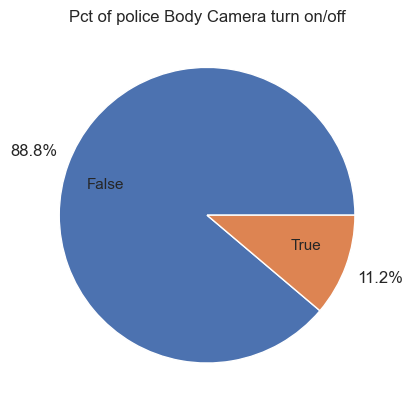

In [722]:
bcam = plt.subplot()
bcam.set_title('Pct of police Body Camera turn on/off')
bcam.pie(df_deaths_by_police_bcam.values,
         labels=df_deaths_by_police_bcam.index,
         autopct='%1.1f%%',
         pctdistance=1.25, 
         labeldistance=.6)

###### Households' income

In [723]:
df_household_income.sample(1)

,Geographic Area,City,Median Income
18312,NC,Hallsboro CDP,37500


In [724]:
df_household_income_state = df_household_income.groupby('Geographic Area', as_index=False)['Median Income'].mean().sort_values(by='Median Income', ascending=False)
df_household_income_state['Median Income'] = df_household_income_state['Median Income'].astype('int')
df_household_income_state.head()

,Geographic Area,Median Income
31,NJ,80434
20,MD,77290
6,CT,75149
19,MA,71765
7,DC,70848


Text(0.5, 1.0, 'States Avg. Income')

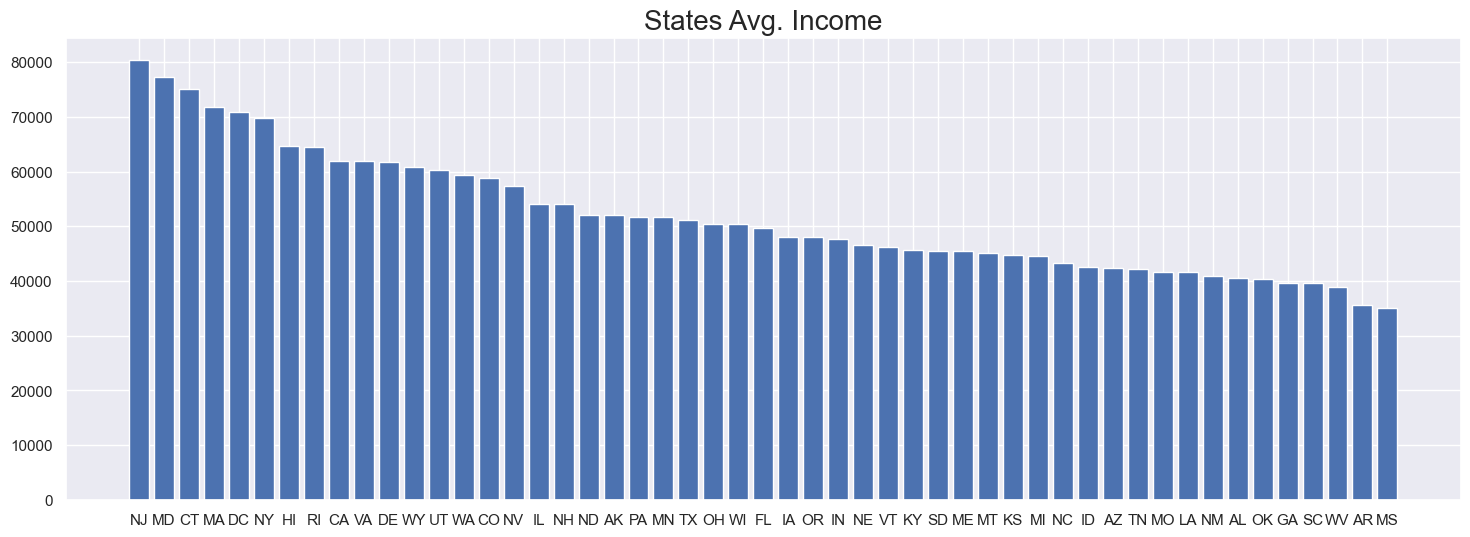

In [725]:
plt.figure(figsize=(18,6))
state = plt.subplot()

state.bar(x=df_household_income_state['Geographic Area'],
          height=df_household_income_state['Median Income'])
state.set_title('States Avg. Income', fontsize=20)

In [726]:
df_household_income_city = df_household_income.groupby('City', as_index=False)['Median Income'].mean().sort_values(by='Median Income', ascending=False)
df_household_income_city['Median Income'] = df_household_income_city['Median Income'].astype('int')
df_household_income_city.head()

,City,Median Income
4557,Crisman CDP,244083
18035,Scarsdale village,242782
3597,Chevy Chase Section Three village,242500
8915,Hidden Hills city,241667
3598,Chevy Chase View town,238125


###### Pct_high school completion

In [727]:
high_school_completion_by_state = df_pct_over_25_completed_high_school.groupby(['Geographic Area', 'City'])['percent_completed_hs'].mean().reset_index()

In [728]:
high_school_completion_by_state = round(df_pct_over_25_completed_high_school.groupby(['Geographic Area'])['percent_completed_hs'].mean().reset_index(),1)
high_school_completion_by_state = high_school_completion_by_state.sort_values(by='percent_completed_hs',ascending=False)

In [729]:
high_school_completion_by_state.sample(5)

,Geographic Area,percent_completed_hs
14,IL,88.5
33,NV,87.7
48,WI,90.3
19,MA,92.4
36,OK,82.9


In [730]:
high_school_completion_by_city = df_pct_over_25_completed_high_school.groupby(['City'])['percent_completed_hs'].mean().reset_index()
high_school_completion_by_city = high_school_completion_by_city.sort_values(by='percent_completed_hs', ascending=False)

In [731]:
high_school_completion_by_city

,City,percent_completed_hs
10883,Keyport CDP,100.0
3326,Cartago CDP,100.0
16596,Pearsonville CDP,100.0
3404,Castine CDP,100.0
7248,Floriston CDP,100.0
...,...,...
17750,Rampart CDP,0.0
12460,Los Corralitos CDP,0.0
12447,Los Altos CDP,0.0
17821,Ratamosa CDP,0.0


###### Share by Race

In [732]:
df_share_of_race_by_state_city.sample(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
16006,NJ,Glassboro borough,72.2,18.7,0.1,2.9,7.4
19569,OH,Greenwich village,99.1,0.2,0.0,0.4,1.1
10583,LA,Mermentau village,87.9,9.1,0.5,0.2,0.9
21385,OR,Shady Cove city,95.5,0.3,0.7,0.3,4.7
3246,CA,Strawberry CDP (Marin County),80.2,2.1,0.3,10.9,6.5


In [733]:
share_race_by_states = round(df_share_of_race_by_state_city.groupby('Geographic area', as_index=False)['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'].mean(),1)

C:\Users\JingH\AppData\Local\Temp\ipykernel_21140\771811367.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [734]:
share_race_by_states.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.6,0.6,45.9,1.4,2.1
1,AL,72.5,23.3,0.7,0.5,3.0
2,AR,78.4,16.3,0.8,0.5,4.3
3,AZ,59.9,1.0,28.6,0.7,20.1
4,CA,71.9,2.7,1.7,5.6,29.6


In [735]:
share_race_by_city = round(df_share_of_race_by_state_city.groupby('City', as_index=False)['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'].mean(),1)

C:\Users\JingH\AppData\Local\Temp\ipykernel_21140\1398700348.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [736]:
share_race_by_city.head()

,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Aaronsburg CDP (Centre County),99.2,0.2,0.0,0.0,0.5
1,Aaronsburg CDP (Washington County),90.7,1.5,1.2,0.0,1.5
2,Abanda CDP,67.2,30.2,0.0,0.0,1.6
3,Abbeville city,48.1,47.2,0.2,1.8,3.1
4,Abbeville town,90.2,8.8,0.0,0.0,0.5


##### Analysis the question

###### is the number of body cameras turned on related? 

In [737]:
df_deaths_by_police.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
2218,2470,Leroy Brown,2017-03-29,shot,vehicle,28,M,B,New Castle,DE,False,other,Car,False,2017


In [738]:
df_deaths_by_police['date'] = df_deaths_by_police['date'].dt.year

In [739]:
df_deaths_by_police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,2017,shot,undetermined,16,M,B,Marion,AR,False,undetermined,Not fleeing,False,2017
2523,2808,Kesharn K. Burney,2017,shot,vehicle,25,M,B,Dayton,OH,False,attack,Car,False,2017
2525,2820,Deltra Henderson,2017,shot,gun,39,M,B,Homer,LA,False,attack,Car,False,2017
2533,2817,Isaiah Tucker,2017,shot,vehicle,28,M,B,Oshkosh,WI,False,attack,Car,True,2017


In [740]:
df_deaths_by_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       2254 non-null   int64 
 1   name                     2254 non-null   object
 2   date                     2254 non-null   int64 
 3   manner_of_death          2254 non-null   object
 4   armed                    2254 non-null   object
 5   age                      2254 non-null   int32 
 6   gender                   2254 non-null   object
 7   race                     2254 non-null   object
 8   city                     2254 non-null   object
 9   state                    2254 non-null   object
 10  signs_of_mental_illness  2254 non-null   bool  
 11  threat_level             2254 non-null   object
 12  flee                     2254 non-null   object
 13  body_camera              2254 non-null   bool  
 14  year                     2254 non-null  

In [741]:
df_deaths_by_police_bcam_by_year = df_deaths_by_police.groupby(['date', 'body_camera'], as_index=False)['id'].count()

In [742]:
df_deaths_by_police_bcam_by_year.rename(columns={'id':'count'})

,date,body_camera,count
0,2015,False,875
1,2015,True,72
2,2016,False,741
3,2016,True,132
4,2017,False,386
5,2017,True,48


In [743]:
df_bcam_true = df_deaths_by_police_bcam_by_year[df_deaths_by_police_bcam_by_year['body_camera'] == True]

In [744]:
df_bcam_true

,date,body_camera,id
1,2015,True,72
3,2016,True,132
5,2017,True,48


In [745]:
df_bcam_false = df_deaths_by_police_bcam_by_year[df_deaths_by_police_bcam_by_year['body_camera'] == False]

In [746]:
df_bcam_false

,date,body_camera,id
0,2015,False,875
2,2016,False,741
4,2017,False,386


In [747]:
df_deaths_by_police_trend

,year,id
0,2015,947
1,2016,873
2,2017,434


Text(0.5, 1.0, 'Death by police trend')

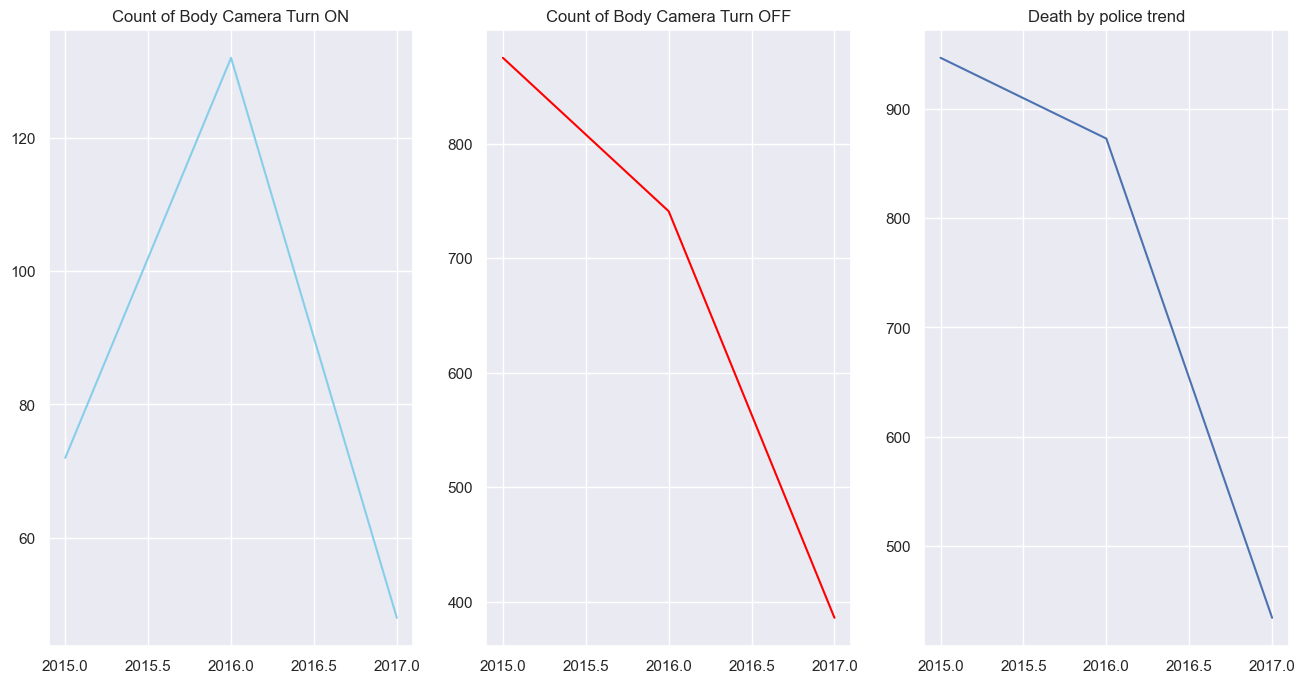

In [748]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.plot(df_bcam_true['date'],df_bcam_true['id'], color='skyblue')
plt.title('Count of Body Camera Turn ON')

plt.subplot(1,3,2)
plt.plot(df_bcam_false['date'], df_bcam_false['id'], color='red')
plt.title('Count of Body Camera Turn OFF')

plt.subplot(1,3,3)
plt.plot(df_deaths_by_police_trend['year'], df_deaths_by_police_trend['id'])
plt.title('Death by police trend')

In [749]:
df_deaths_by_police.groupby(['year', 'body_camera'], as_index=False)['id'].count()

,year,body_camera,id
0,2015,False,875
1,2015,True,72
2,2016,False,741
3,2016,True,132
4,2017,False,386
5,2017,True,48


###### Is the number of mental illness victims drop? 

In [750]:
df_deaths_by_police_mental.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, False to True
Series name: id
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 18.0 bytes


In [751]:
temp = df_deaths_by_police.groupby(['year','signs_of_mental_illness'], as_index=False)['id'].count()

In [752]:
fig = px.bar(data_frame=temp,
             x='year',
             y='id',
             title='Sign of mental issue by year',
             color='signs_of_mental_illness',
             barmode='group',
             width=800,
             height=400)

fig.show()

In [753]:
df_deaths_by_police.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
726,859,Keith Harrison McLeod,2015,shot,unarmed,19,M,B,Reisterstown,MD,False,other,Foot,False,2015


###### Is armed type changed over time? 

In [754]:
temp =  df_deaths_by_police.groupby(['year', 'armed'], as_index=False)['id'].count()

In [755]:
temp

,year,armed,id
0,2015,Taser,3
1,2015,ax,1
2,2015,baseball bat,1
3,2015,baseball bat and fireplace poker,1
4,2015,bean-bag gun,1
...,...,...,...
106,2017,toy weapon,16
107,2017,unarmed,25
108,2017,undetermined,11
109,2017,unknown weapon,5


In [756]:
fig = px.bar(data_frame=temp,
             x='year',
             y='id',
             title='Change of armed type by year',
             color='armed',
             width=800,
             height=800)
fig.show()

###### Is the threat level change over time? 

In [757]:
temp =  df_deaths_by_police.groupby(['year', 'threat_level'], as_index=False)['id'].count()
temp

,year,threat_level,id
0,2015,attack,699
1,2015,other,209
2,2015,undetermined,39
3,2016,attack,497
4,2016,other,321
5,2016,undetermined,55
6,2017,attack,266
7,2017,other,147
8,2017,undetermined,21


In [758]:
fig = px.bar(data_frame=temp,
             x='year',
             y='id',
             title='Threat Level by year',
             color='threat_level',
             width=600,
             height=400)
fig.show()

###### Is the flee type change over time? 

In [759]:
temp =  df_deaths_by_police.groupby(['year', 'flee'], as_index=False)['id'].count()
temp

,year,flee,id
0,2015,Car,142
1,2015,Foot,108
2,2015,Not fleeing,679
3,2015,Other,18
4,2016,Car,133
5,2016,Foot,115
6,2016,Not fleeing,576
7,2016,Other,49
8,2017,Car,85
9,2017,Foot,55


In [760]:
fig = px.bar(data_frame=temp,
             x='year',
             y='id',
             title='Flee type change by year',
             color='flee',
             width=800,
             height=400)
fig.show()

###### Does the age group change over time?

In [761]:
df_deaths_by_police.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
854,1000,Ryan Quinn Martin,2015,shot,gun,32,M,B,Baltimore,MD,False,attack,Not fleeing,False,2015


In [762]:
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [763]:
df_deaths_by_police['Age group'] = pd.cut(df_deaths_by_police['age'], bins, labels=labels, include_lowest=True)

In [764]:
df_deaths_by_police_armed_gun = df_deaths_by_police[df_deaths_by_police['armed'] == 'gun']

In [765]:
age_group_distribution_armed_gun = df_deaths_by_police_armed_gun.groupby('Age group')['id'].count()

In [766]:
age_group_distribution_armed_gun

Age group
0-17      57
18-29    383
30-39    361
40-49    212
50-59    156
60-69     61
70+       17
Name: id, dtype: int64

In [767]:
fig = px.pie(data_frame=age_group_distribution_armed_gun,
             values=age_group_distribution_armed_gun.values,
             names=age_group_distribution_armed_gun.index,
             title='Age Group Distribution of victims with gun',
             width=800,
             height=400
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [768]:
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-20', '21-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [769]:
df_deaths_by_police['Age group 2'] = pd.cut(df_deaths_by_police['age'], bins, labels=labels, include_lowest=True)

In [770]:
df_deaths_by_police_armed_gun = df_deaths_by_police[df_deaths_by_police['armed'] == 'gun']

In [771]:
age_group_distribution_2 = df_deaths_by_police_armed_gun.groupby('Age group 2')['id'].count()

In [772]:
fig = px.pie(data_frame=age_group_distribution_2,
             values=age_group_distribution_2.values,
             names=age_group_distribution_2.index,
             title='Age Group Distribution if only allow age 21 and above to own gun',
             width=800,
             height=400
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

###### Is higher income result in less victims? 

In [773]:
df_household_income_state_no_victims = df_household_income_state.merge(df_deaths_by_police_state.to_frame(), left_on='Geographic Area', right_on='state')


In [774]:
df_household_income_state_no_victims = df_household_income_state_no_victims.rename(columns={'id':'Count'})

In [775]:
fig = px.scatter(data_frame=df_household_income_state_no_victims,
                 x='Count',
                 y='Median Income',
                 color='Geographic Area',
                 size='Count',
                 hover_data=['Geographic Area', 'Median Income', 'Count'],
                 title='Will the states with higher median income have less victims?')
fig.show()

In [776]:
fig = px.choropleth(locations=df_household_income_state_no_victims['Geographic Area'],
                    locationmode='USA-states',
                    color=df_household_income_state_no_victims['Count'],
                    scope='usa',
                    title='Victims distribution in U.S.')
fig.show()

###### Will low proverty rate states have less death number? 

In [777]:
df_pct_people_below_poverty_by_state  = round(df_pct_people_below_poverty.groupby('Geographic Area', as_index=False)['poverty_rate'].mean(),1)

In [778]:
df_pct_people_below_poverty_by_state

,Geographic Area,poverty_rate
0,AK,19.9
1,AL,20.6
2,AR,23.0
3,AZ,25.7
4,CA,17.1
5,CO,13.4
6,CT,9.1
7,DC,18.0
8,DE,12.6
9,FL,17.6


In [779]:
df_pct_people_below_poverty_by_state_no_victims = df_pct_people_below_poverty_by_state.merge(df_deaths_by_police_state.to_frame(), left_on='Geographic Area', right_on='state')


In [780]:
df_pct_people_below_poverty_by_state_no_victims = df_pct_people_below_poverty_by_state_no_victims.rename(columns={'id':'Count', 'poverty_rate':'Poverty Rate'})

In [781]:
fig = px.scatter(data_frame=df_pct_people_below_poverty_by_state_no_victims,
                 x='Count',
                 y='Poverty Rate',
                 color='Geographic Area',
                 size='Count',
                 hover_data=['Geographic Area', 'Poverty Rate', 'Count'],
                 title='Poverty Rate v.s. Number of Deaths')
fig.show()

###### Higher high school completion rate has lower rate? 

In [782]:
high_school_completion_by_state.sample()

,Geographic Area,percent_completed_hs
26,MT,90.5


In [783]:
df_high_school_completion_by_state_no_victims = high_school_completion_by_state.merge(df_deaths_by_police_state.to_frame(), left_on='Geographic Area', right_on='state')


In [784]:
df_high_school_completion_by_state_no_victims = df_high_school_completion_by_state_no_victims.rename(columns={'id':'Count', 'percent_completed_hs':'Pct of Completed High School'})

In [785]:
fig = px.scatter(data_frame=df_high_school_completion_by_state_no_victims,
                 x='Count',
                 y='Pct of Completed High School',
                 color='Geographic Area',
                 size='Count',
                 hover_data=['Geographic Area', 'Pct of Completed High School', 'Count'],
                 title='Rate of High School Completion v.s. Number of Deaths')
fig.show()

###### will a higher high school completion rate lower the poverty rate? 

In [786]:
df_high_school_completion_vs_poverty_rate = high_school_completion_by_state.merge(df_pct_people_below_poverty_by_state, left_on='Geographic Area', right_on='Geographic Area')


In [787]:
df_high_school_completion_vs_poverty_rate = df_high_school_completion_vs_poverty_rate.rename(columns={'poverty_rate':'Poverty Rate','percent_completed_hs':'Pct of High School Completion' })

In [788]:
fig = px.scatter(data_frame=df_high_school_completion_vs_poverty_rate,
                 x='Poverty Rate',
                 y='Pct of High School Completion',
                 color='Geographic Area',
                 hover_data=['Geographic Area', 'Pct of High School Completion', 'Poverty Rate'],
                 title='Pct of High School Completion v.s. Poverty Rate')
fig.show()

C:\Users\JingH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



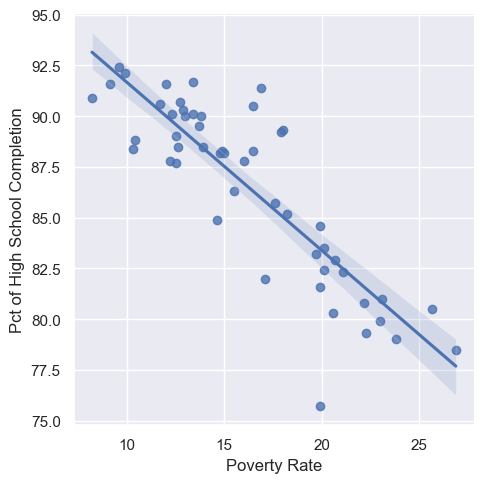

In [789]:
sns.lmplot(data=df_high_school_completion_vs_poverty_rate,
           x='Poverty Rate',
           y='Pct of High School Completion')

###### if the race distribution is a factor? (white)

In [790]:
df_deaths_by_police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,Age group,Age group 2
0,3,Tim Elliot,2015,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,50-59,50-59
1,4,Lewis Lee Lembke,2015,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,40-49,40-49
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015,18-29,21-29
3,8,Matthew Hoffman,2015,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,30-39,30-39
4,9,Michael Rodriguez,2015,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015,30-39,30-39


In [791]:
df_deaths_by_police_by_state_race = df_deaths_by_police.groupby(['state', 'race'], as_index=False)['id'].count()

In [792]:
df_deaths_by_police_by_state_race

,state,race,id
0,AK,B,1
1,AK,N,6
2,AK,W,7
3,AL,B,14
4,AL,W,31
...,...,...,...
156,WV,B,2
157,WV,W,19
158,WY,H,1
159,WY,N,1


In [793]:
df_race_white_no_victim = df_deaths_by_police_by_state_race.loc[df_deaths_by_police_by_state_race['race'] == 'W']

In [794]:
df_race_white_no_victim.tail(10)

,state,race,id
127,SD,W,6
132,TN,W,41
137,TX,W,90
140,UT,W,18
144,VA,W,21
146,VT,W,2
152,WA,W,30
155,WI,W,29
157,WV,W,19
160,WY,W,5


In [795]:
df_deaths_by_police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,Age group,Age group 2
0,3,Tim Elliot,2015,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,50-59,50-59
1,4,Lewis Lee Lembke,2015,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,40-49,40-49
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,2015,18-29,21-29
3,8,Matthew Hoffman,2015,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,30-39,30-39
4,9,Michael Rodriguez,2015,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,2015,30-39,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,2017,shot,undetermined,16,M,B,Marion,AR,False,undetermined,Not fleeing,False,2017,0-17,0-20
2523,2808,Kesharn K. Burney,2017,shot,vehicle,25,M,B,Dayton,OH,False,attack,Car,False,2017,18-29,21-29
2525,2820,Deltra Henderson,2017,shot,gun,39,M,B,Homer,LA,False,attack,Car,False,2017,30-39,30-39
2533,2817,Isaiah Tucker,2017,shot,vehicle,28,M,B,Oshkosh,WI,False,attack,Car,True,2017,18-29,21-29


In [796]:
df_race_white_pct_by_state = round(df_share_of_race_by_state_city.groupby('Geographic area', as_index=False)['share_white'].mean(),1)

In [797]:
df_race_white_pct_by_state.sample()

,Geographic area,share_white
38,PA,93.3


In [798]:
df_share_of_race_by_state_vs_w = df_race_white_pct_by_state.merge(df_race_white_no_victim, left_on='Geographic area', right_on='state')


In [799]:
df_share_of_race_by_state_vs_w = df_share_of_race_by_state_vs_w.rename(columns={'id':'Count'})

In [800]:
fig = px.scatter(data_frame=df_share_of_race_by_state_vs_w,
                 x='Count',
                 y='share_white',
                 color='Geographic area',
                 hover_data=['Geographic area', 'share_white', 'Count'],
                 title='Share of White v.s. Number of Victims')
fig.show()

###### if the race distribution is a factor? (black)

In [801]:
df_race_black_no_victim = df_deaths_by_police_by_state_race.loc[df_deaths_by_police_by_state_race['race'] == 'B']

In [802]:
df_race_black_no_victim.tail(10)

,state,race,id
115,OR,B,4
117,PA,B,21
120,RI,B,1
122,SC,B,14
129,TN,B,11
134,TX,B,44
142,VA,B,19
148,WA,B,7
153,WI,B,11
156,WV,B,2


In [803]:
df_race_black_pct_by_state = round(df_share_of_race_by_state_city.groupby('Geographic area', as_index=False)['share_black'].mean(),1)

In [804]:
df_race_black_pct_by_state.sample()

,Geographic area,share_black
42,TN,7.3


In [805]:
df_share_of_race_by_state_vs_b = df_race_black_pct_by_state.merge(df_race_black_no_victim, left_on='Geographic area', right_on='state')

In [806]:
df_share_of_race_by_state_vs_b = df_share_of_race_by_state_vs_b.rename(columns={'id':'Count'})

In [807]:
fig = px.scatter(data_frame=df_share_of_race_by_state_vs_b,
                 x='Count',
                 y='share_black',
                 color='Geographic area',
                 hover_data=['Geographic area', 'share_black', 'Count'],
                 title='Share of Black v.s. Number of Victims')
fig.show()

In [808]:
df_race_hispanic_no_victim = df_deaths_by_police_by_state_race.loc[df_deaths_by_police_by_state_race['race'] == 'H']

In [809]:
df_race_hispanic_no_victim.tail(10)

,state,race,id
118,PA,H,2
121,RI,H,1
123,SC,H,1
130,TN,H,2
135,TX,H,61
138,UT,H,3
143,VA,H,2
149,WA,H,6
154,WI,H,2
158,WY,H,1


In [810]:
df_race_hispanic_pct_by_state = round(df_share_of_race_by_state_city.groupby('Geographic area', as_index=False)['share_hispanic'].mean(),1)

In [811]:
df_race_hispanic_pct_by_state.sample()

,Geographic area,share_hispanic
4,CA,29.6


In [812]:
df_share_of_race_by_state_vs_h = df_race_hispanic_pct_by_state.merge(df_race_hispanic_no_victim, left_on='Geographic area', right_on='state')

In [813]:
df_share_of_race_by_state_vs_h = df_share_of_race_by_state_vs_h.rename(columns={'id':'Count'})

In [814]:
fig = px.scatter(data_frame=df_share_of_race_by_state_vs_h,
                 x='Count',
                 y='share_hispanic',
                 color='Geographic area',
                 hover_data=['Geographic area', 'share_hispanic', 'Count'],
                 title='Share of Hispanic v.s. Number of Victims')
fig.show()

###### The trend of death for under age over the period.

In [815]:
df_deaths_by_police.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,Age group,Age group 2
1935,2163,Miriam Ann Savino,2016,shot,knife,53,F,W,Lake Wales,FL,False,other,Not fleeing,False,2016,50-59,50-59


In [816]:
df_deaths_by_police_underage = df_deaths_by_police[df_deaths_by_police['age'] < 18]

In [817]:
df_deaths_by_police_underage.groupby('date')['id'].count()

date
2015    18
2016    16
2017    15
Name: id, dtype: int64

###### race distribution in top 10 states

In [818]:
df_deaths_by_police_state_race_pct = pd.pivot_table(data=df_deaths_by_police,
                       values='id',
                       index='state',
                       columns='race',
                       aggfunc='count')

In [819]:
df_deaths_by_police_state_race_pct

race,A,B,H,N,O,W
state,,,,,,
AK,NaN,1.0,NaN,6.0,NaN,7.0
AL,NaN,14.0,NaN,NaN,NaN,31.0
AR,NaN,5.0,NaN,NaN,NaN,15.0
AZ,NaN,5.0,36.0,8.0,NaN,56.0
CA,14.0,62.0,159.0,1.0,8.0,122.0
CO,2.0,8.0,21.0,1.0,NaN,31.0
CT,NaN,NaN,2.0,NaN,NaN,5.0
DC,NaN,10.0,NaN,NaN,NaN,1.0
DE,NaN,4.0,NaN,NaN,NaN,4.0


In [820]:
df_deaths_by_police_state_race_pct = df_deaths_by_police_state_race_pct.fillna(0)

In [821]:
df_deaths_by_police_state_race_pct = df_deaths_by_police_state_race_pct.div(df_deaths_by_police_state_race_pct.sum(1), axis=0)

In [822]:
df_deaths_by_police_state_race_pct.style.format('{:.2%}')

race,A,B,H,N,O,W
state,,,,,,
AK,0.00%,7.14%,0.00%,42.86%,0.00%,50.00%
AL,0.00%,31.11%,0.00%,0.00%,0.00%,68.89%
AR,0.00%,25.00%,0.00%,0.00%,0.00%,75.00%
AZ,0.00%,4.76%,34.29%,7.62%,0.00%,53.33%
CA,3.83%,16.94%,43.44%,0.27%,2.19%,33.33%
CO,3.17%,12.70%,33.33%,1.59%,0.00%,49.21%
CT,0.00%,0.00%,28.57%,0.00%,0.00%,71.43%
DC,0.00%,90.91%,0.00%,0.00%,0.00%,9.09%
DE,0.00%,50.00%,0.00%,0.00%,0.00%,50.00%


In [823]:
df_deaths_by_police_state_top_10 = df_deaths_by_police_state.head(10)

In [824]:
df_deaths_by_police_state_top_10 = pd.DataFrame(data=df_deaths_by_police_state_top_10)

In [825]:
df_deaths_by_police_state_top_10 = df_deaths_by_police_state_top_10.merge(right=df_deaths_by_police_state_race_pct, left_on='state', right_on='state')

In [826]:
df_deaths_by_police_state_top_10.style.format('{:.2%}')

,id,A,B,H,N,O,W
state,,,,,,,
CA,36600.00%,3.83%,16.94%,43.44%,0.27%,2.19%,33.33%
TX,20000.00%,1.00%,22.00%,30.50%,0.00%,1.50%,45.00%
FL,13600.00%,0.74%,34.56%,13.24%,0.00%,1.47%,50.00%
AZ,10500.00%,0.00%,4.76%,34.29%,7.62%,0.00%,53.33%
OH,7000.00%,2.86%,38.57%,0.00%,0.00%,2.86%,55.71%
NC,6600.00%,1.52%,42.42%,3.03%,0.00%,0.00%,53.03%
OK,6500.00%,1.54%,23.08%,6.15%,0.00%,0.00%,69.23%
CO,6300.00%,3.17%,12.70%,33.33%,1.59%,0.00%,49.21%
GA,6100.00%,1.64%,34.43%,9.84%,0.00%,0.00%,54.10%


In [827]:
df_deaths_by_police_state_top_10 = df_deaths_by_police_state_top_10.drop(columns='id')

In [828]:
df_deaths_by_police_state_top_10 = round(df_deaths_by_police_state_top_10 * 100, 1)

In [829]:
df_deaths_by_police_state_top_10

,A,B,H,N,O,W
state,,,,,,
CA,3.8,16.9,43.4,0.3,2.2,33.3
TX,1.0,22.0,30.5,0.0,1.5,45.0
FL,0.7,34.6,13.2,0.0,1.5,50.0
AZ,0.0,4.8,34.3,7.6,0.0,53.3
OH,2.9,38.6,0.0,0.0,2.9,55.7
NC,1.5,42.4,3.0,0.0,0.0,53.0
OK,1.5,23.1,6.2,0.0,0.0,69.2
CO,3.2,12.7,33.3,1.6,0.0,49.2
GA,1.6,34.4,9.8,0.0,0.0,54.1


In [830]:
# df_deaths_by_police_state_top_10 = df_deaths_by_police_state_top_10.sort_values('W',ascending=False)

In [831]:
fig2 = px.bar(data_frame=df_deaths_by_police_state_top_10,
             x=df_deaths_by_police_state_top_10.index,
             y=df_deaths_by_police_state_top_10.columns)

In [832]:
fig2.show()

In [833]:
list_top_10_states = df_deaths_by_police_state_top_10.index.tolist()

In [834]:
list_top_10_states

['CA', 'TX', 'FL', 'AZ', 'OH', 'NC', 'OK', 'CO', 'GA', 'MO']

In [835]:
test = share_race_by_states[share_race_by_states['Geographic area'].isin(list_top_10_states)]

In [836]:
test = test.set_index('Geographic area')

In [837]:
test = test.loc[list_top_10_states]

In [838]:
# test = test.sort_values('share_white', ascending=False)

In [839]:
test

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
CA,71.9,2.7,1.7,5.6,29.6
TX,82.6,5.9,0.7,1.0,39.4
FL,78.7,13.4,0.5,1.6,16.5
AZ,59.9,1.0,28.6,0.7,20.1
OH,92.8,4.0,0.2,0.8,2.1
NC,71.5,20.4,1.8,0.9,6.4
OK,72.9,3.4,14.4,0.4,5.7
CO,87.8,0.9,1.6,1.2,17.9
GA,62.6,30.6,0.3,1.5,6.4


In [840]:
fig1 = px.bar(data_frame=test,
             x=test.index,
             y=test.columns)
fig1.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': list_top_10_states})
fig1.show()

###### What weapon do victims use when they attacted the police officers?

In [841]:
victims_attack_armed_type = df_deaths_by_police[df_deaths_by_police['threat_level'] == 'attack']

In [842]:
victims_attack_armed_type = victims_attack_armed_type.groupby('armed', as_index=False)['id'].count()

In [843]:
victims_attack_armed_type = victims_attack_armed_type.sort_values(by='id', ascending=False)

In [844]:
victims_attack_armed_type

,armed,id
11,gun,1064
17,knife,107
34,toy weapon,78
38,vehicle,66
35,unarmed,63
36,undetermined,17
37,unknown weapon,7
0,Taser,5
19,machete,5
2,baseball bat,3


In [845]:
victims_attack_armed_type = victims_attack_armed_type.rename(columns={'id':'Count'})

In [846]:
fig = px.pie(data_frame=victims_attack_armed_type,
       values='Count',
       names='armed',
       title='Weapon used when victims attack police officer',
       width=800,
       height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [847]:
victims_attack_armed_type.sample()

,armed,Count
29,rock,2


([<matplotlib.patches.Wedge at 0x2b75bd62380>,
 [Text(-0.39362456563435194, 0.45283518119639043, 'gun'),
  Text(0.05407697695761873, -0.5975580980650543, 'knife'),
  Text(0.281202065758534, -0.5300239600368394, 'toy weapon'),
  Text(0.42924843562821074, -0.41922044381295837, 'vehicle'),
  Text(0.5275872714552056, -0.28574756516626904, 'unarmed'),
  Text(0.5686911565680981, -0.19128609055872015, 'undetermined'),
  Text(0.5777956877411488, -0.1617162429310454, 'unknown weapon'),
  Text(0.5817731559214153, -0.1467651016053767, 'Taser'),
  Text(0.5847923379104634, -0.1342308515998258, 'machete'),
  Text(0.5870133344404971, -0.12415854859432385, 'baseball bat'),
  Text(0.5885652766133653, -0.1165800804813272, 'blunt object'),
  Text(0.5900193833730595, -0.1089822336166526, 'gun and knife'),
  Text(0.591375413007842, -0.10136627096724148, 'hammer'),
  Text(0.5926331401090373, -0.093733458511367, 'sword'),
  Text(0.5937923556085003, -0.08608506502819374, 'screwdriver'),
  Text(0.5946829771244

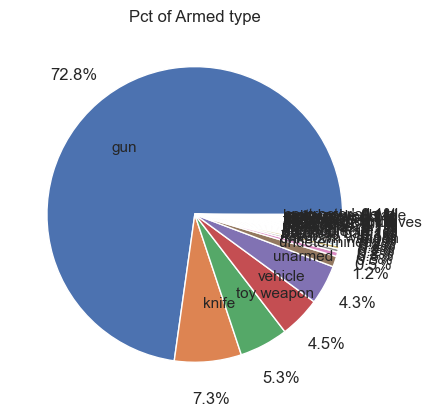

In [848]:
flee = plt.subplot()
flee.set_title('Pct of Armed type')
flee.pie(victims_attack_armed_type.Count,
         labels=victims_attack_armed_type.armed,
         autopct='%1.1f%%',
         pctdistance=1.25, 
         labeldistance=.6)

In [849]:
victims_othern_than_attack_armed_type = df_deaths_by_police[df_deaths_by_police['threat_level'] != 'attack']

In [850]:
victims_othern_than_attack_armed_type = victims_othern_than_attack_armed_type.groupby('armed', as_index=False).count().sort_values(by='id', ascending=False)

In [851]:
victims_othern_than_attack_armed_type = victims_othern_than_attack_armed_type.rename(columns={'id':'Count'})

In [852]:
fig = px.pie(data_frame=victims_othern_than_attack_armed_type,
       values='Count',
       names='armed',
       title='Weapon used when victims showing other behaviour to police officer',
       width=800,
       height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [853]:
count_no_attack_victim = victims_othern_than_attack_armed_type['Count'].sum()

In [854]:
count_attack_victim = victims_attack_armed_type['Count'].sum()

In [855]:
compare_attack_victims_armed = pd.DataFrame({'Behaviour':['Attack','Others'],
                                             'Count':[count_attack_victim, count_no_attack_victim]})
compare_attack_victims_armed

,Behaviour,Count
0,Attack,1462
1,Others,792


In [856]:
fig = px.pie(data_frame=compare_attack_victims_armed,
       values='Count',
       names='Behaviour',
       title='Compare victims behaviour',
       width=800,
       height=400)
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()